In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import pickle
%matplotlib inline

In [2]:
column_names = ['Vendor_Name', 'Model_Name', 'MYCT', 'MMIN', 'MMAX', 'CACH','CHMIN','CHMAX', 'PRP', 'ERP']

In [3]:
df = pd.read_csv('machine.csv', names=column_names)
df.head()

,Vendor_Name,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendor_Name  209 non-null    object
 1   Model_Name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [5]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [6]:
df.isnull().sum()

Vendor_Name    0
Model_Name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

In [7]:
df

,Vendor_Name,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [8]:
df.corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


<AxesSubplot:>

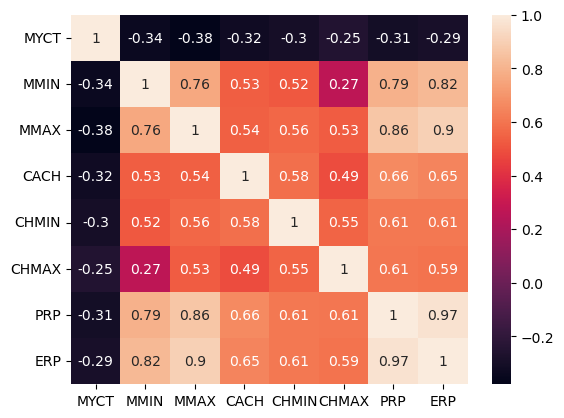

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
df['Vendor_Name'].value_counts()

ibm             32
nas             19
ncr             13
sperry          13
honeywell       13
siemens         12
cdc              9
amdahl           9
burroughs        8
hp               7
harris           7
dg               7
dec              6
c.r.d            6
ipl              6
magnuson         6
cambex           5
prime            5
formation        5
perkin-elmer     3
gould            3
nixdorf          3
wang             2
bti              2
basf             2
apollo           2
microdata        1
four-phase       1
sratus           1
adviser          1
Name: Vendor_Name, dtype: int64

(array([90., 37., 27.,  6., 12.,  5.,  6.,  2.,  2.,  3.,  5.,  1.,  0.,
         2.,  4.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  15.  ,   39.46,   63.92,   88.38,  112.84,  137.3 ,  161.76,
         186.22,  210.68,  235.14,  259.6 ,  284.06,  308.52,  332.98,
         357.44,  381.9 ,  406.36,  430.82,  455.28,  479.74,  504.2 ,
         528.66,  553.12,  577.58,  602.04,  626.5 ,  650.96,  675.42,
         699.88,  724.34,  748.8 ,  773.26,  797.72,  822.18,  846.64,
         871.1 ,  895.56,  920.02,  944.48,  968.94,  993.4 , 1017.86,
        1042.32, 1066.78, 1091.24, 1115.7 , 1140.16, 1164.62, 1189.08,
        1213.54, 1238.  ]),
 <BarContainer object of 50 artists>)

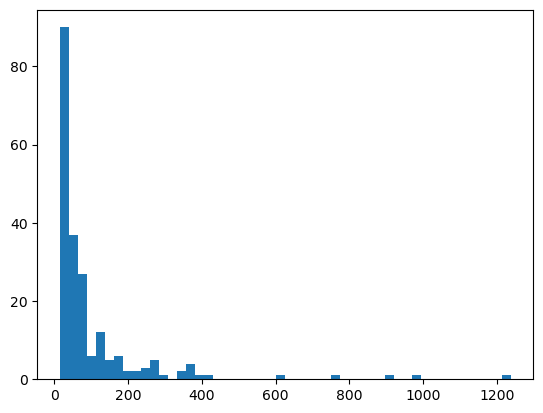

In [11]:
plt.hist(df['ERP'], bins=50)

In [12]:
df[df['MYCT'] > 1000]

,Vendor_Name,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
102,ibm,38/3,1100,512,1500,0,1,1,7,18
103,ibm,38/4,1100,768,2000,0,1,1,13,20
122,ibm,8130-a,1500,768,1000,0,0,0,12,18
123,ibm,8130-b,1500,768,2000,0,0,0,18,20


In [13]:
df.head()

,Vendor_Name,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


C:\Users\muham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ERP'>

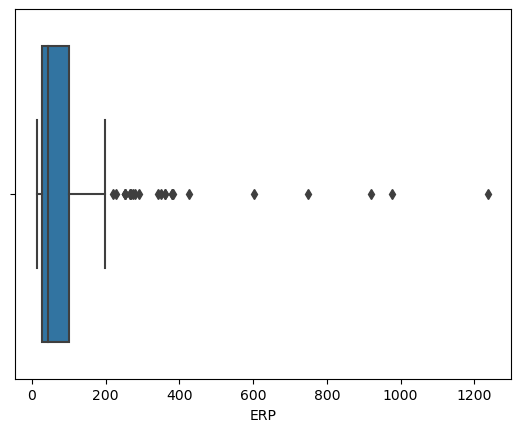

In [14]:
sns.boxplot(df['ERP'])

In [15]:
X = df.iloc[:, :-1]
y = df['ERP']

In [16]:
X.head()

,Vendor_Name,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,adviser,32/60,125,256,6000,256,16,128,198
1,amdahl,470v/7,29,8000,32000,32,8,32,269
2,amdahl,470v/7a,29,8000,32000,32,8,32,220
3,amdahl,470v/7b,29,8000,32000,32,8,32,172
4,amdahl,470v/7c,29,8000,16000,32,8,16,132


In [17]:
y = pd.DataFrame(y)

In [18]:
y.head()

,ERP
0,199
1,253
2,253
3,253
4,132


<AxesSubplot:>

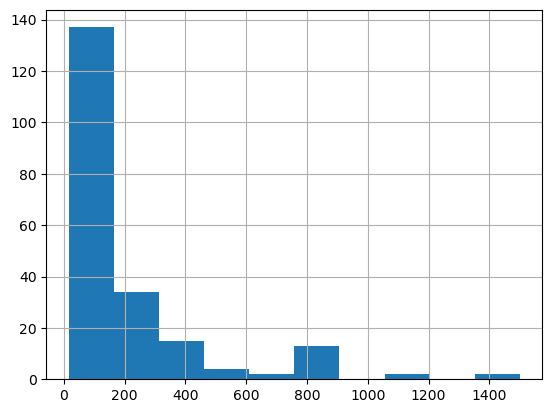

In [19]:
df['MYCT'].hist()

In [20]:
continuous_features = X.select_dtypes(include=[int])
continuous_features

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42
205,98,1000,8000,32,2,8,46
206,125,2000,8000,0,2,14,52
207,480,512,8000,32,0,0,67


In [21]:
from sklearn.preprocessing import OneHotEncoder

ohe_vendor = OneHotEncoder(sparse=False)
vendor_encoded = ohe_vendor.fit_transform(X[['Vendor_Name']])

ohe_model = OneHotEncoder(sparse=False)
model_encoded = ohe_model.fit_transform(X[['Model_Name']])



In [22]:
X['Vendor_Name'].unique()

array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
       'cdc', 'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould',
       'hp', 'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [23]:
vendor_encoded = pd.DataFrame(vendor_encoded, columns=X['Vendor_Name'].unique())
model_encoded = pd.DataFrame(model_encoded, columns=X['Model_Name'].unique())

In [24]:
vendor_encoded.head()

,adviser,amdahl,apollo,basf,bti,burroughs,c.r.d,cdc,cambex,dec,...,microdata,nas,ncr,nixdorf,perkin-elmer,prime,siemens,sperry,sratus,wang
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
model_encoded.head()

,32/60,470v/7,470v/7a,470v/7b,470v/7c,470v/b,580-5840,580-5850,580-5860,580-5880,...,1100/94,80/3,80/4,80/5,80/6,80/8,90/80-model-3,32,vs-100,vs-90
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
encoded_features = pd.concat([vendor_encoded, model_encoded], axis=1)
encoded_features.head()

,adviser,amdahl,apollo,basf,bti,burroughs,c.r.d,cdc,cambex,dec,...,1100/94,80/3,80/4,80/5,80/6,80/8,90/80-model-3,32,vs-100,vs-90
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:

encoded_X = pd.concat([X[column_names[:-1]], encoded_features], axis=1)

In [29]:
encoded_X.drop(['Vendor_Name', 'Model_Name'], axis=1, inplace=True)
encoded_X.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,adviser,amdahl,apollo,...,1100/94,80/3,80/4,80/5,80/6,80/8,90/80-model-3,32,vs-100,vs-90
0,125,256,6000,256,16,128,198,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,8000,32000,32,8,32,269,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29,8000,32000,32,8,32,220,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29,8000,32000,32,8,32,172,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29,8000,16000,32,8,16,132,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X_transformed = encoded_X
X_transformed.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,adviser,amdahl,apollo,...,1100/94,80/3,80/4,80/5,80/6,80/8,90/80-model-3,32,vs-100,vs-90
0,125,256,6000,256,16,128,198,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,8000,32000,32,8,32,269,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29,8000,32000,32,8,32,220,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29,8000,32000,32,8,32,172,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29,8000,16000,32,8,16,132,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
data = pd.concat([X_transformed, y], axis=1)
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001D7C0598430> (for post_execute):


KeyboardInterrupt: 

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.linear_model import ElasticNet

In [35]:
base_elastic_model = ElasticNet()

In [36]:
param_grid = {
    'alpha' : [0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100],
    'l1_ratio' : [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99, 1]
}

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
grid_model = GridSearchCV(base_elastic_model, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

In [39]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\muham\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.039e+03, tolerance: 1.319e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\muham\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+03, tolerance: 1.152e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\muham\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.254e+03, toleranc

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100],
                         'l1_ratio': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7,
                                      0.9, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [40]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.99)

In [41]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.99}

In [42]:
y_pred = grid_model.predict(X_test)

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test, y_pred)

0.8560476254020454

In [47]:
data = {
    'model': grid_model,
    'ohe_vendor': ohe_vendor,
    'ohe_model': ohe_model
}

with open('saves_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [48]:
with open('saves_steps.pkl', 'rb') as file:
    pickle.load(file)
    
regressor_loaded = data['model']
ohe_vendor = data['ohe_vendor']
ohe_model = data['ohe_model']

In [50]:
y_pred = regressor_loaded.predict(X_test)
r2_score(y_test, y_pred)

0.8560476254020454

In [52]:
df['Model_Name'].unique()

array(['32/60', '470v/7', '470v/7a', '470v/7b', '470v/7c', '470v/b',
       '580-5840', '580-5850', '580-5860', '580-5880', 'dn320', 'dn420',
       '7/65', '7/68', '5000', '8000', 'b1955', 'b2900', 'b2925', 'b4955',
       'b5900', 'b5920', 'b6900', 'b6925', '68/10-80', 'universe:2203t',
       'universe:68', 'universe:68/05', 'universe:68/137',
       'universe:68/37', 'cyber:170/750', 'cyber:170/760',
       'cyber:170/815', 'cyber:170/825', 'cyber:170/835', 'cyber:170/845',
       'omega:480-i', 'omega:480-ii', 'omega:480-iii', '1636-1',
       '1636-10', '1641-1', '1641-11', '1651-1', 'decsys:10:1091',
       'decsys:20:2060', 'microvax-1', 'vax:11/730', 'vax:11/750',
       'vax:11/780', 'eclipse:c/350', 'eclipse:m/600', 'eclipse:mv/10000',
       'eclipse:mv/4000', 'eclipse:mv/6000', 'eclipse:mv/8000',
       'eclipse:mv/8000-ii', 'f4000/100', 'f4000/200', 'f4000/200ap',
       'f4000/300', 'f4000/300ap', '2000/260', 'concept:32/8705',
       'concept:32/8750', 'concept:32/8780'

In [53]:
X_test.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,adviser,amdahl,apollo,...,1100/94,80/3,80/4,80/5,80/6,80/8,90/80-model-3,32,vs-100,vs-90
30,25,1310,2620,131,12,24,274,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,200,1000,4000,0,1,4,30,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,330,1000,4000,0,3,6,22,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,30,8000,64000,96,12,176,915,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,800,256,8000,0,1,4,16,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
